<a href="https://colab.research.google.com/github/PosgradoMNA/IAAEquipo59/blob/Valeria/MNA_IAyAA_semana_6_Actividad_rev5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Valeria Alejandra Ramírez Herrera - A01240716
*   Elber Aguilar Pérez - A01793568
*   Francisco
*   Daniel
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [48]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, learning_curve, validation_curve 
from sklearn.metrics import fbeta_score, make_scorer

import matplotlib.pyplot as plt


#**Ejercicio-1.** 

In [49]:
input = 'https://data.ub.uni-muenchen.de/23/2/kredit.asc' #Importación de datos

In [50]:
df = pd.read_table(input, sep=' ')
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [51]:
#Se renombraron las columnas de alemán a inglés
ndf= df.copy()
ndf.rename(columns ={'kredit':'credit_risk','laufkont':'status','laufzeit':'duration',
                     'moral':'credit_history','verw':'purpose','hoehe':'amount',
                     'sparkont':'savings','beszeit':'employment_duration',
                     'rate':'installment_rate','famges':'personal_status_sex',
                     'buerge':'other_debtors','wohnzeit':'present_residence',
                     'verm':'property','alter':'age','weitkred':'other_installment_plans',
                     'wohn':'housing','bishkred':'number_credits','beruf':'job',
                     'pers':'people_liable','telef':'telephone','gastarb':'foreign_worker'},
                     inplace = True)
ndf

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


#**Ejercicio-2.**

In [52]:
X = ndf.iloc[:,1:] #Variables de Entrada
X


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [53]:
Y = ndf.iloc[:,0] #Variable de Salida
Y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: credit_risk, Length: 1000, dtype: int64

In [54]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15, random_state = 0)
 

print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(Ytrain.shape, ': dimensión de variable de salida para entrenamiento')
print(Ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento
(150,) : dimensión de variable de salida para prueba


In [55]:
Ytrain.sum() / Ytrain.shape[0] #Personas a las que se les aprobó el crédito
Ytrain.describe()

count    850.000000
mean       0.700000
std        0.458527
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: credit_risk, dtype: float64

#**Ejercicio-3.**

In [56]:
ndf.info() #verificación de que no hay valores nulos y es el tipo de variable es correcta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   credit_risk              1000 non-null   int64
 1   status                   1000 non-null   int64
 2   duration                 1000 non-null   int64
 3   credit_history           1000 non-null   int64
 4   purpose                  1000 non-null   int64
 5   amount                   1000 non-null   int64
 6   savings                  1000 non-null   int64
 7   employment_duration      1000 non-null   int64
 8   installment_rate         1000 non-null   int64
 9   personal_status_sex      1000 non-null   int64
 10  other_debtors            1000 non-null   int64
 11  present_residence        1000 non-null   int64
 12  property                 1000 non-null   int64
 13  age                      1000 non-null   int64
 14  other_installment_plans  1000 non-null   int64
 15  housi

In [57]:
# Variables CATEGORICAL: 'status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors','other_installment_plans', 'housing'
# Variables ORDINAL/DISCRETIZED QUANTITATIVE: 'employment_duration', 'installment_rate', 'property', 'number_credits', 'job','present_residence'
# Variables QUANTITATIVE: 'duration', 'amount', 'age'
# Variables BINARY: 'telephone', 'foreign_worker', 'credit_risk', 'people_liable'

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

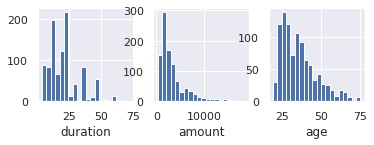

In [59]:
# Agregamos histogramas para validar distribución 

variables = ['duration', 'amount', 'age']
sns.set(rc={'figure.figsize':(10,10)}) 

for x in range(0,3):
    plt.subplot(5,5, x+1) 
    var = ndf[variables[x]]
    
    plt.hist(var, bins=20)
    plt.xlabel(variables[x])
plt.show()

In [60]:

# Imputación a todas las variables de entrada, diferenciando entre el tipo de cada 
#variable (decide y justifica que tipo de imputación realizas en cada caso).


# Transformaciones a factores QUANTITATIVE de entrada:
numeric_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')), #si hay datos perdidos númericos/continuos se puede aplicar la mediana
                                 ('escalaNum', MinMaxScaler(feature_range=(0,1)))])  #variables numéricas se colocan en rango
numeric_pipeline_nombres = ['duration', 'amount', 'age'] #Transformacion de categóricas númericas/continuas

# Transformaciones a factores CATEGORICAL de entrada, NO SE USA:
categ_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  #Datos perdidos categóricos se usa la moda
categ_pipeline_nombres = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex',
                           'other_debtors','other_installment_plans', 'housing']

# Transformaciones a factores DISCRETIZED QUANTITATIVE de entrada, NO SE USA:
discrete_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  #Datos perdidos categóricos se usa la moda
discrete_pipeline_nombres = ['employment_duration', 'installment_rate', 'property', 
                             'number_credits', 'job','present_residence']

# Transformaciones a factores BINARY de entrada: NO SE USA.
binary_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  #Datos perdidos categóricos se usa la moda
binary_pipeline_nombres = ['telephone', 'foreign_worker', 'people_liable']


# Transformaciones One-Hot encoding a las variables de entrada de tipo categórico y binaria:
cat_binOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))]) #OneHotE convierte factores a columnas/vectores dependiendo la cantidad de categorías
                                                            #Se quita la primera columna
                                                            #Variables categóricas
cat_binOHE_pipeline_nombres = [ 'status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors','other_installment_plans', 'housing', #Variables categóricas
                           'telephone', 'foreign_worker', 'people_liable'] #Variables binarias

                           #PENDIENTE JUSTIFICAR PORQUE SE LE APLICA EL ONE HOT ENCODER A VARIABLES BINARIAS




In [61]:
# Conjuntamos las transformaciones numéricas, discreta y categóricas+binarias que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', numeric_pipeline, numeric_pipeline_nombres), #se juntan las transformaciones numéricas
                                                        ('catbinohe', cat_binOHE_pipeline, cat_binOHE_pipeline_nombres)],#se juntan las transformaciones OneHotE
                                        remainder='passthrough') 
                                         #Se juntan las que no sufrieron transformación

In [62]:
#Confirmación de que el set no tiene valores nulos de manera general
#ndf.isnull().values.any() #Se hace verificación si falta algún dato

In [63]:
#Confirmación de que el set no tiene valores nulos por variable
#ndf.isnull().any() #En cuales columnas falta al menos 1 dato

#**Ejercicio-4.**

In [64]:
#Definición de los módelos a evaluar

def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RFC - Random Forest:
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')

  return modelos, nombres

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(10,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    if(i<2):
       plt.ylabel('f1_score')
    else:
       plt.ylabel('recall') 
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [67]:
def mi_ModeloYCurvas(Xin,i):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = modelos[i]
 
       xcolumnas = columnasTransformer.fit(Xin)
       Xtransform = xcolumnas.transform(Xin)

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)
       delta_train_sz = np.linspace(0.1, 1.0, num=20)


       if(i<2):
          if(i==1):
             param_range, train_scores, test_scores = create_validation_curve(modelos[1], Xtrain, Ytrain, cv,
                                                                 'max_depth', make_scorer(mi_fscore))
             mi_ValidationCurvePlot(param_range, train_scores, test_scores,i=2) #Max_depth solo aplica para Decision Tree

          else:
             tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_fscore), #Aplica para LogisticRegression
                                                        random_state=0)
             mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)   
       else:
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_recall), #Aplica para RandomFores
                                                        random_state=0)
          mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i) 

In [68]:
def mi_ValidationCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(10,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curva de validación acorde a max_depth')
    plt.xlabel('Max_Depth de 1 a 20')
    plt.ylabel('f1 score')  

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

In [69]:
def create_validation_curve (model, x_val, y_val,cv,param_name,scoring= 'accuracy' ):
    
    pipe = Pipeline(steps = [
      ('cT', columnasTransformer ),
      ('model', model)
  ])
    
    param_range = np.linspace(1,20,20,dtype="int")

    t_scores, v_scores = validation_curve(
      estimator= pipe,
      X = x_val,
      y = y_val,
      param_name = f"model__{param_name}",
      param_range = param_range,
      cv = cv,
      scoring = scoring,
      )

    return param_range, t_scores, v_scores

Información/Métricas de Entrenamiento
LR:
mean Accuracy: 0.745 (0.0341)
mean Recall: 0.871 (0.0337)
mean Gmean: 0.626 (0.0572)
mean Precision: 0.788 (0.0244)
mean Fscore: 0.802 (0.0063)

Información/Métricas de Prueba
LR:
mean Accuracy: 0.784 (0.0084)
mean Recall: 0.902 (0.0060)
mean Gmean: 0.677 (0.0174)
mean Precision: 0.811 (0.0082)
mean Fscore: 0.808 (0.0010)
 


Curva de aprendizaje del modelo: LogisticRegression(solver='liblinear')


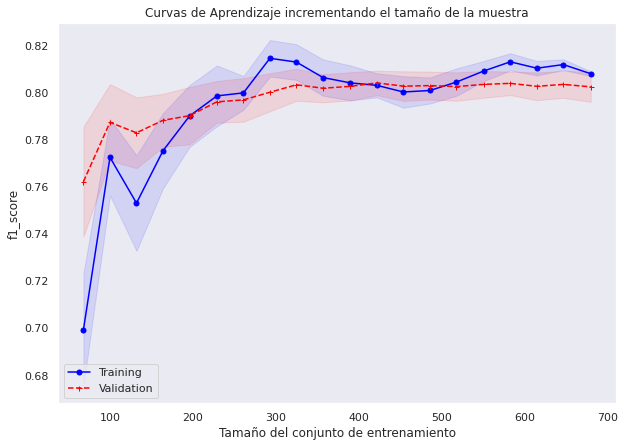

Información/Métricas de Entrenamiento
DT:
mean Accuracy: 0.675 (0.0292)
mean Recall: 0.764 (0.0371)
mean Gmean: 0.597 (0.0375)
mean Precision: 0.770 (0.0202)
mean Fscore: 0.781 (0.0086)

Información/Métricas de Prueba
DT:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.824 (0.0000)
 


Curva de aprendizaje del modelo: DecisionTreeClassifier()


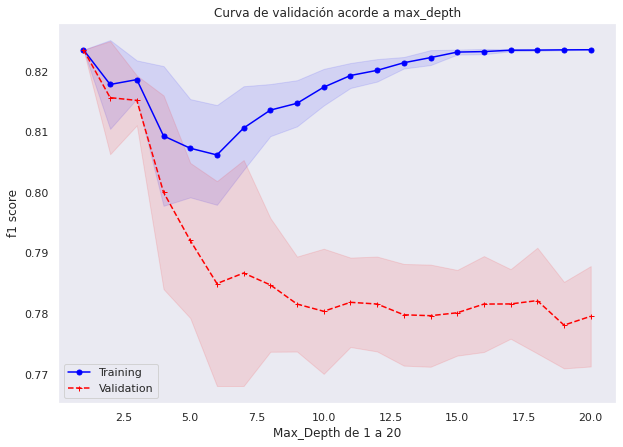

Información/Métricas de Entrenamiento
RFC:
mean Accuracy: 0.742 (0.0280)
mean Recall: 0.903 (0.0313)
mean Gmean: 0.574 (0.0403)
mean Precision: 0.769 (0.0161)
mean Fscore: 0.808 (0.0055)

Información/Métricas de Prueba
RFC:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.824 (0.0000)
 


Curva de aprendizaje del modelo: RandomForestClassifier()


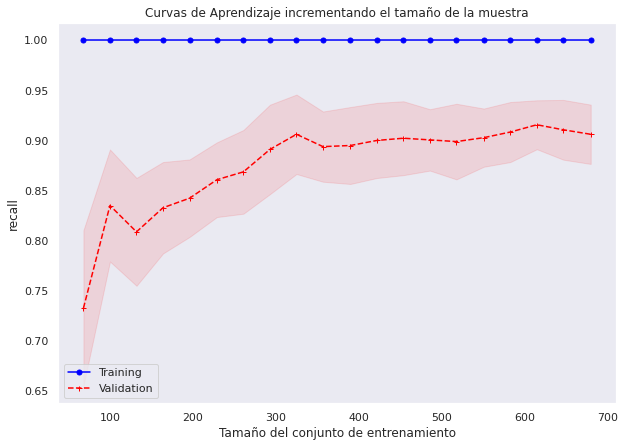

In [70]:
modelos, nombres = get_models()  # cargamos los modelos a comparar

resultados=list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])]) #a cada iteración de modelos se da uno de los previamente definidos

#Acorde a la instrucción, se toman las 5 particiones y las 3 repeticiones
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) 
    
#Cálculo de métricas
  mismetricas_ = {'accuracy':make_scorer(mi_accuracy), 'recall':make_scorer(mi_recall), 
                  'gmean':make_scorer(mi_gmean),'precision':make_scorer(mi_precision),
                  'fscore':make_scorer(mi_fscore) }

#Se hace la validación cruzada
  resultadosOU = cross_validate(pipeline, 
                          Xtrain, np.ravel(Ytrain),
                          scoring=mismetricas_,
                          cv=cv,
                          return_train_score=True)
 
  resultados.append(resultadosOU)
    
#Se imprimen todas las métricas para datos de Entrenamiento y Prueba
  print("Información/Métricas de Entrenamiento")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_fscore']),
                                                                          np.std(resultadosOU['test_fscore']) 
                                                                          ))
  print("Información/Métricas de Prueba")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']), 
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_gmean']),
                                                                          np.std(resultadosOU['train_gmean']),
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']),
                                                                          np.mean(resultadosOU['train_fscore']),
                                                                          np.std(resultadosOU['train_fscore']) 
                                                                          ),"\n\n")
  
  #Se imprimen las 3 gráficas solicitadas, una específica para cada tipo de modelo

  print('Curva de aprendizaje del modelo:', modelos[i])
  mi_ModeloYCurvas(Xtrain,i)
  


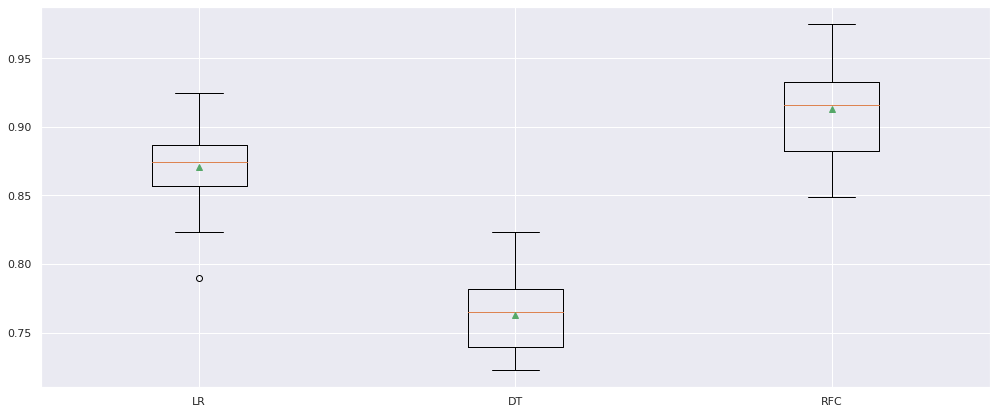

In [ ]:
# Diagrama Bigotes con variable recall

sns.set(rc={'figure.figsize':(10,7)})
bpRecall = list()
for i in range(len(resultados)):

  bpRecall.append(resultados[i]['test_recall'])

plt.boxplot(bpRecall, labels=nombres, showmeans=True)

plt.show()



#PENDIENTE ANALISIS DE SI LOS MODELOS ESTAN SUB O SOBRE ENTRENADOS

#**Ejercicio-5.**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [71]:
#Búsqueda de hiperparámetros, enfocados en f1-score

modeloHP = LogisticRegression(max_iter=10000, random_state=0)

pipeline = Pipeline(steps=[('cT',columnasTransformer),('m',modeloHP)])

dicc_grid = {'C':np.linspace(0.1,100,10),
             'solver':['newton-cg','lbfgs'],
             'class_weight':[None,'balanced'],
             'penalty':['l2']
                          }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)


grid = GridSearchCV(estimator=modeloHP, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=make_scorer(mi_fscore)) #Acorde a la instrucción se hace en base a f1-score

Xx = columnasTransformer.fit_transform(Xtrain)

grid.fit(Xx, Ytrain)

print('Mejor valor de f1-score obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de f1-score obtenido con la mejor combinación: 0.8109561726684184
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
Métrica utilizada: make_scorer(mi_fscore)


#**Ejercicio-6.**

In [ ]:
None

###**Fin de la Actividad de la semana 6.**